In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/steel-dataset/Steel_industry.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2024-03-16 12:47:11.231048: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 12:47:11.231188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 12:47:11.386620: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df = pd.read_csv('/kaggle/input/steel-dataset/Steel_industry.csv')

In [4]:
df.head(10)

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,01/01/2018 01:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,01/01/2018 01:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,01/01/2018 02:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load
8,01/01/2018 02:15,3.28,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load
9,01/01/2018 02:30,3.78,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load


In [5]:
df.tail(10)

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
35031,31/12/2018 22:00,3.42,0.00,13.07,0.0,100.00,25.31,79200,Weekday,Monday,Light_Load
35032,31/12/2018 22:15,3.24,3.38,0.22,0.0,69.20,99.77,80100,Weekday,Monday,Light_Load
35033,31/12/2018 22:30,3.67,4.43,0.00,0.0,63.80,100.00,81000,Weekday,Monday,Light_Load
35034,31/12/2018 22:45,3.82,4.54,0.00,0.0,64.38,100.00,81900,Weekday,Monday,Light_Load
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load
35040,31/12/2018 20:00,4.15,0.00,20.10,0.0,100.00,20.19,72000,Weekday,Monday,Light_Load


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  object 
 1   Usage_kWh                             35041 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35041 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35041 non-null  float64
 4   CO2(tCO2)                             35041 non-null  float64
 5   Lagging_Current_Power_Factor          35041 non-null  float64
 6   Leading_Current_Power_Factor          35041 non-null  float64
 7   NSM                                   35041 non-null  int64  
 8   WeekStatus                            35041 non-null  object 
 9   Day_Of_Week                           35041 non-null  object 
 10  Load_Type                             35041 non-null  object 
dtypes: float64(6), 

In [7]:
#check missing value

missing_values = df.iloc[:, :10].isnull().sum()

missing_values

Date_Time                               0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_Of_Week                             0
dtype: int64

In [13]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000
mean,27.386229,13.035012,3.871412,0.011524,80.578610,84.366038,42750.834736
std,33.444133,16.305916,7.424863,0.016151,18.921337,30.458030,24940.667915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21600.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,43200.000000
75%,51.230000,22.640000,2.090000,0.020000,99.030000,100.000000,64800.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [8]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

In [9]:
numeric_columns

['Usage_kWh',
 'Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM']

In [10]:
# Convert only numeric columns to Numpy array
data_numeric_np = df[numeric_columns].to_numpy()

# Perform a basic inspection: Check for anomalies such as extremely high values or negative values that don't make sense
basic_stats = {
    "Min": np.min(data_numeric_np, axis=0),
    "Max": np.max(data_numeric_np, axis=0),
    "Mean": np.mean(data_numeric_np, axis=0),
    "Median": np.median(data_numeric_np, axis=0),
    "Std": np.std(data_numeric_np, axis=0)
}

In [11]:
basic_stats

{'Min': array([0., 0., 0., 0., 0., 0., 0.]),
 'Max': array([1.5718e+02, 9.6910e+01, 2.7760e+01, 7.0000e-02, 1.0000e+02,
        1.0000e+02, 8.5500e+04]),
 'Mean': array([2.73862293e+01, 1.30350116e+01, 3.87141177e+00, 1.15239291e-02,
        8.05786105e+01, 8.43660384e+01, 4.27508347e+04]),
 'Median': array([4.570e+00, 5.000e+00, 0.000e+00, 0.000e+00, 8.796e+01, 1.000e+02,
        4.320e+04]),
 'Std': array([3.34436556e+01, 1.63056833e+01, 7.42475704e+00, 1.61504779e-02,
        1.89210667e+01, 3.04575956e+01, 2.49403120e+04])}

Data Visualization in Numpy - Histogram for Usage_kWh

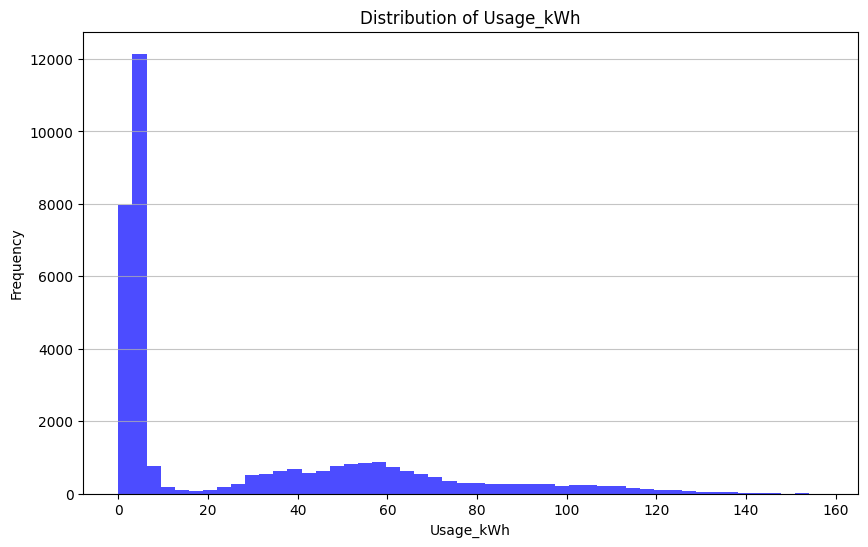

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Usage_kWh'], bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Usage_kWh')
plt.xlabel('Usage_kWh')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Encoding Categorical Variables

In [14]:
from sklearn.preprocessing import OneHotEncoder

# Creating an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Columns to be encoded
categorical_columns = ['WeekStatus', 'Day_Of_Week', 'Load_Type']

# Applying OneHotEncoder
encoded_categorical = encoder.fit_transform(df[categorical_columns])

encoded_categorical

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

Normalization and Standardization

In [15]:
from sklearn.preprocessing import StandardScaler

# Creating an instance of StandardScaler
scaler = StandardScaler()

# Columns to be scaled - using the numeric_columns list identified previously
scaled_numeric = scaler.fit_transform(df[numeric_columns])

# This scaled data can then be used for machine learning models.

In [16]:
# Combining encoded categorical and scaled numeric data
prepared_data = np.concatenate([scaled_numeric, encoded_categorical], axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test = train_test_split(prepared_data, test_size=0.2, random_state=42)

# Displaying the shape of the training and testing sets
X_train.shape, X_test.shape

((28032, 19), (7009, 19))

Define, compile, and train our Regression Model.

In [17]:
# Adjusting dataset for regression
# Extracting Usage_kWh as the target variable and removing it from the input features
target_column = 'Usage_kWh'
Y = df[target_column].values
X = np.delete(prepared_data, numeric_columns.index(target_column), axis=1)

# Splitting the dataset into training and testing sets for the regression task
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model Definition
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_reg.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)  # Single output node for regression
])

# Model Compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Model Summary
model.summary()

# Training the Model
history = model.fit(X_train_reg, Y_train_reg, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

# Model Evaluation
loss = model.evaluate(X_test_reg, Y_test_reg, verbose=0)

loss

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,753 (42.00 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

2.4297993183135986